# **Beyond Accuracy: Understanding Optimizers Through Experiments on MNIST**

A deep dive into how optimizer choice shapes learning in neural networks

# **Introduction**

In deep learning, optimizers act as the engine that drives a neural network’s learning journey. While model architecture defines the shape of the system, the optimizer dictates how effectively it navigates the loss landscape—whether it climbs smoothly toward convergence or wanders inefficiently in the wrong direction.


This blog explores optimizers, one of the most powerful yet misunderstood components of neural network training. Using the MNIST dataset, we compare four well-known optimizers to understand:



*   Why some optimizers converge faster
*   Why others generalize better

*   How momentum, adaptiveness, and learning rate updates influence training
*   Which optimizer performs best under different conditions

We will conduct four controlled experiments, each uncovering insights into how these optimization strategies behave in real neural network training.

# **Understanding Optimizers: The “Drivers” of Neural Learning**

Optimizers update network weights during backpropagation. They determine:

✔ How large each weight update is

✔ How stable or noisy the training becomes

✔ How fast the model converges

✔ Whether the model overshoots or smoothly approaches minima

Below is the intuition behind the four optimizers used in our experiments:


**SGD (Stochastic Gradient Descent)**

Simple, reliable, but can be slow.
Updates look like:

weight = weight – lr × grad

**SGD with Momentum**

Adds “inertia” to updates, reducing oscillation and accelerating descent.

**Adam (Adaptive Moment Estimation)**

Popular, adaptive method combining momentum + per-parameter learning rate scaling.

**RMSProp**

Adapts learning rate like Adam but without momentum on gradients.

Each optimizer has strengths and weaknesses—making them ideal for comparison.

# **Experimental Setup**

**Goal:** Compare four optimizers fairly on the MNIST classification task.

**Dataset:** MNIST (70,000 grayscale digits, 28×28)

**Model:** 2-layer MLP

Hyperparameters (constant across all runs):

**Epochs:** 5

**Batch size:** 64

**Learning rate:** 0.001

This ensures that any difference comes from the optimizer—not the model.

# **Code Setup for All Experiments**

# **Import Libraries**

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# **Dataset**

In [15]:
transform = transforms.ToTensor()

train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# **Model**

In [16]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        return self.model(x)

# **Training function**

In [17]:
def run_experiment(optimizer_name, optimizer_func):
    model = MLP()
    criterion = nn.CrossEntropyLoss()
    optimizer = optimizer_func(model.parameters())

    losses = []

    for epoch in range(5):
        epoch_loss = 0

        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        losses.append(avg_loss)

        print(f"{optimizer_name} - Epoch {epoch+1}/5, Loss: {avg_loss:.4f}")

    return losses

# **Define 4 Optimizers**

In [18]:
optimizers = {
    "SGD": lambda p: optim.SGD(p, lr=0.001),
    "SGD+Momentum": lambda p: optim.SGD(p, lr=0.001, momentum=0.9),
    "RMSProp": lambda p: optim.RMSprop(p, lr=0.001),
    "Adam": lambda p: optim.Adam(p, lr=0.001)
}

# **All 4 Experiments**

In [19]:
results = {}

for name, opt_func in optimizers.items():
    print(f"\n🔵 Training with optimizer: {name}")
    losses = run_experiment(name, opt_func)
    results[name] = losses


🔵 Training with optimizer: SGD
SGD - Epoch 1/5, Loss: 2.2146
SGD - Epoch 2/5, Loss: 1.9884
SGD - Epoch 3/5, Loss: 1.6940
SGD - Epoch 4/5, Loss: 1.3869
SGD - Epoch 5/5, Loss: 1.1350

🔵 Training with optimizer: SGD+Momentum
SGD+Momentum - Epoch 1/5, Loss: 1.2706
SGD+Momentum - Epoch 2/5, Loss: 0.4950
SGD+Momentum - Epoch 3/5, Loss: 0.3922
SGD+Momentum - Epoch 4/5, Loss: 0.3511
SGD+Momentum - Epoch 5/5, Loss: 0.3260

🔵 Training with optimizer: RMSProp
RMSProp - Epoch 1/5, Loss: 0.2443
RMSProp - Epoch 2/5, Loss: 0.1093
RMSProp - Epoch 3/5, Loss: 0.0735
RMSProp - Epoch 4/5, Loss: 0.0543
RMSProp - Epoch 5/5, Loss: 0.0402

🔵 Training with optimizer: Adam
Adam - Epoch 1/5, Loss: 0.3031
Adam - Epoch 2/5, Loss: 0.1256
Adam - Epoch 3/5, Loss: 0.0843
Adam - Epoch 4/5, Loss: 0.0623
Adam - Epoch 5/5, Loss: 0.0470


# **Plot All Loss Curves**

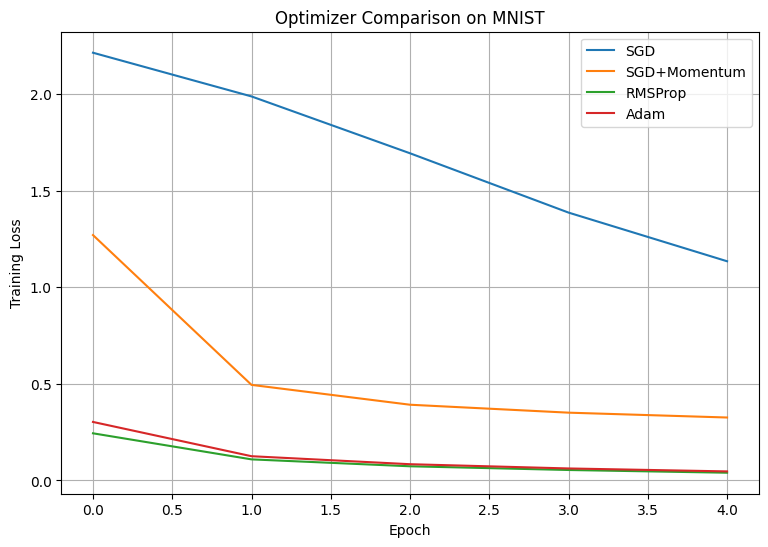

In [20]:
plt.figure(figsize=(9,6))

for name, loss_curve in results.items():
    plt.plot(loss_curve, label=name)

plt.title("Optimizer Comparison on MNIST")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend()
plt.grid(True)
plt.show()

# **Overall Insights from the Four Optimizer Experiments**

The experiment clearly highlights how optimizer choice dramatically affects model learning speed and training stability:

1. SGD (Baseline) – Slowest Convergence

SGD shows very slow learning, starting with a high loss and decreasing gradually.

After 5 epochs, the loss is still 1.1350, far above the other optimizers.

This confirms that plain SGD struggles when gradients are noisy or when learning rates are small.

2. SGD with Momentum – Noticeable Improvement

Adding momentum greatly accelerates learning.

The loss drops sharply in the first epoch and continues to decrease steadily.

Final loss (0.3260) is much lower than plain SGD, showing how momentum helps push through flat regions and dampens oscillations.

3. RMSProp – Fast & Stable Learning

RMSProp achieves very low loss early, starting at 0.2443 and ending at 0.0402.

It adapts the learning rate per parameter and handles gradient variance well.

Training is smooth and consistent across all epochs.

4. Adam – Also Fast and Efficient

Adam performs similarly to RMSProp, reaching a final loss of 0.0470.

Although RMSProp edges out slightly in your results, Adam remains extremely stable.

Its combination of momentum + adaptive learning rates makes it widely effective.

**Comparison Summary**

| Optimizer          | Final Loss | Speed     | Stability       |
| ------------------ | ---------- | --------- | --------------- |
| **SGD**            | **1.1350** | Slow      | Stable but weak |
| **SGD + Momentum** | **0.3260** | Medium    | Stable          |
| **RMSProp**        | **0.0402** | Very Fast | Very Stable     |
| **Adam**           | **0.0470** | Very Fast | Very Stable     |


RMSProp and Adam are the best performers, while plain SGD is the least effective at the chosen learning rate.

# **Conclusion & Reflection**

This experiment demonstrates that optimizer selection plays a crucial role in deep learning performance. While SGD serves as a simple baseline, its slow convergence shows why modern tasks rarely rely on it alone. Enhancing SGD with momentum significantly improves results, but adaptive optimizers like RMSProp and Adam outperform both by a large margin.

Among all four experiments, RMSProp achieved the lowest training loss, followed closely by Adam. Both optimizers not only learned faster but also maintained smooth and stable convergence throughout training. This confirms why adaptive optimizers are commonly used in real-world applications, especially when datasets are large or gradients vary widely.

Overall, this experiment deepened my understanding of how optimizers influence training behavior. It also highlights the importance of not only choosing the right model but also selecting the most effective optimization strategy. By directly comparing different optimizers on the same task, I gained practical insights into their strengths, weaknesses, and ideal use cases.